In [40]:
import h5py as h5
import matplotlib.pyplot as plt
import polars as pl

%matplotlib ipympl

In [41]:
file = h5.File("proton_dataset.h5", "r")
df = pl.read_parquet("proton_dataset.parquet")

In [42]:
n_samples = file["samples"].attrs["n_samples"]
sample_iter = iter(range(n_samples))

In [47]:
sample = next(sample_iter)
sample_name = f"sample_{sample}"
sample_data = file["samples"][sample_name][:]
row = df.filter(pl.col("sample") == sample)
print(f"Sample: {sample}")
print(row)

Sample: 2
shape: (1, 7)
┌────────┬──────────┬──────────┬───────────┬────────────┬────────────┬────────────┐
│ sample ┆ energy   ┆ polar    ┆ azimuthal ┆ vertex_x   ┆ vertex_y   ┆ vertex_z   │
│ ---    ┆ ---      ┆ ---      ┆ ---       ┆ ---        ┆ ---        ┆ ---        │
│ i64    ┆ f64      ┆ f64      ┆ f64       ┆ f64        ┆ f64        ┆ f64        │
╞════════╪══════════╪══════════╪═══════════╪════════════╪════════════╪════════════╡
│ 2      ┆ 3.474001 ┆ 0.724376 ┆ 3.077465  ┆ -19.133238 ┆ -16.958265 ┆ 752.439222 │
└────────┴──────────┴──────────┴───────────┴────────────┴────────────┴────────────┘


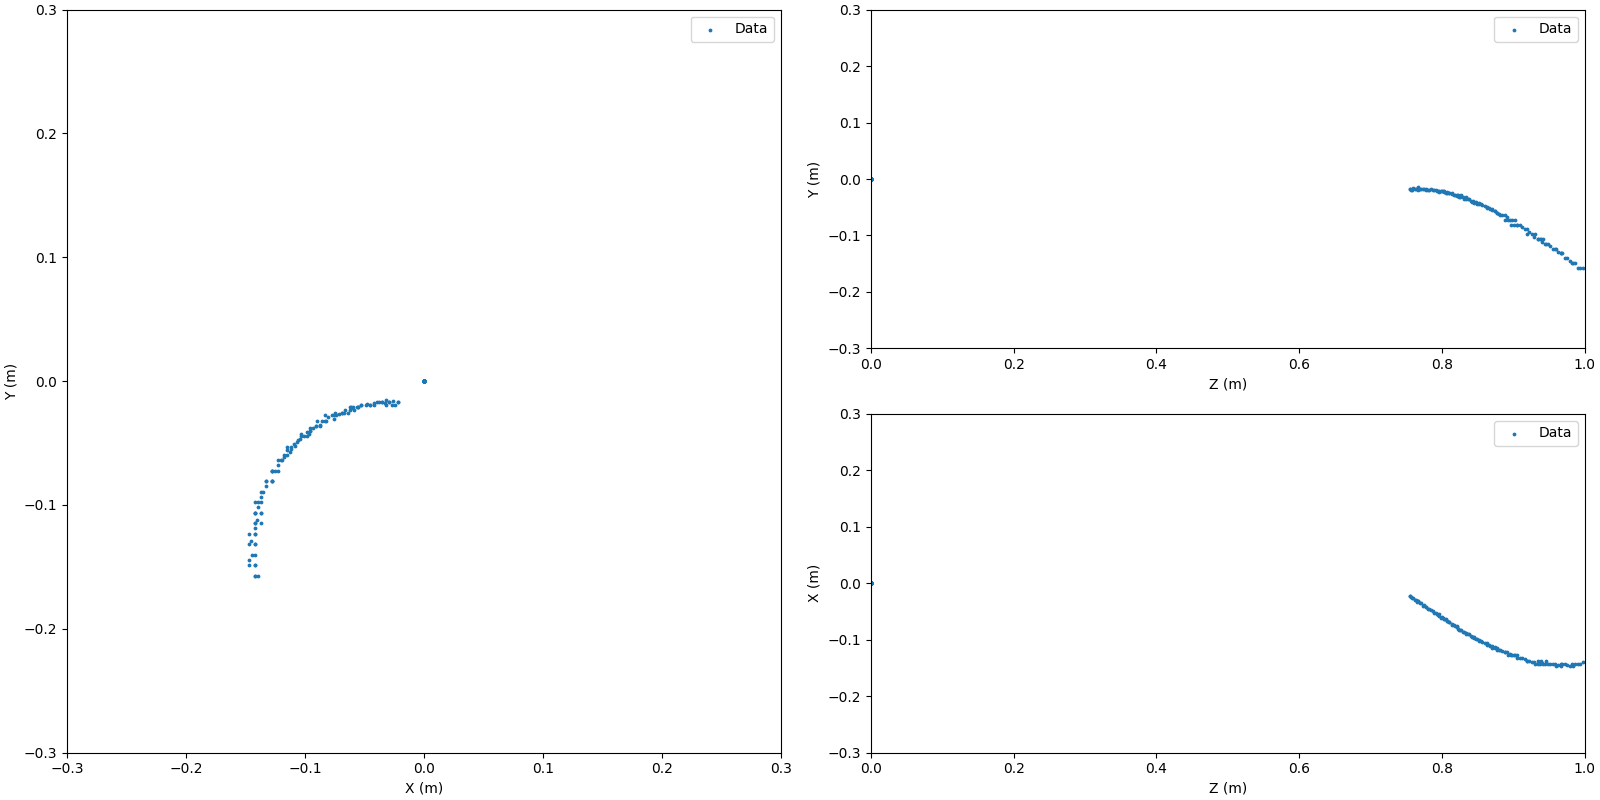

In [48]:
fig, axs = plt.subplot_mosaic(
    """
    AB
    AC
    """,
    constrained_layout=True,
    figsize=(16,8)
)

axs["A"].scatter(sample_data[:, 0]*0.001, sample_data[:, 1]*0.001, s=3, label="Data")
axs["A"].set_xlabel("X (m)")
axs["A"].set_ylabel("Y (m)")
axs["A"].set_xlim(-0.3, 0.3)
axs["A"].set_ylim(-0.3, 0.3)
axs["B"].scatter(sample_data[:, 2]*0.001, sample_data[:, 1]*0.001, s=3, label="Data")
axs["B"].set_xlabel("Z (m)")
axs["B"].set_ylabel("Y (m)")
axs["B"].set_xlim(.0, 1.0)
axs["B"].set_ylim(-0.3, 0.3)
axs["C"].scatter(sample_data[:, 2]*0.001, sample_data[:, 0]*0.001, s=3, label="Data")
axs["C"].set_xlabel("Z (m)")
axs["C"].set_ylabel("X (m)")
axs["C"].set_xlim(.0, 1.0)
axs["C"].set_ylim(-0.3, 0.3)
axs["A"].legend()
axs["B"].legend()
axs["C"].legend()